<a href="https://colab.research.google.com/github/Nachoxt17/Retail-Business-Data-Analytics/blob/main/Retail_Business_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<html>
<body>
<div style="color:#435987;
            border-style: solid;
            border-radius: 25px;
            border-color: #435987;
            padding-left: 10px">
       
<span style="color:#26488F; font-size:40px; font-weight: bold;">  Retail Business Data Analytics </span>

</div>
</body>
</html>

In [ ]:
# Installing basic dependencies:
!pip install opendatasets
!pip install pandas

Importing basic dependencies and DataSet

In [12]:
# Importing basic dependencies::
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Importing DataSet:
dataset_url = "https://www.kaggle.com/datasets/vivek468/superstore-dataset-final"
od.download(dataset_url)

# Checking that the DataSet was Downloaded Successfull:
import os
print(os.listdir("/content/superstore-dataset-final"))

# Reading the CSV file with the correct encoding:
df = pd.read_csv(r"/content/superstore-dataset-final/Sample - Superstore.csv", encoding='latin1')

# Displaying first few rows to confirm it loaded correctly:
df.head()

Skipping, found downloaded files in "./superstore-dataset-final" (use force=True to force download)
['Sample - Superstore.csv']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
# Getting basic info on the structure of the DataSet:
df.info()
# (We discover that 11 Postal Codes are missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Filling Null Values:
df["Postal Code"] = df["Postal Code"].fillna(0)

# Changing the Type of the data of the *Postal Code Column* from "float" to "int", since it is more adequted:
df["Postal Code"] = df["Postal Code"].astype(int)

# Getting basic info on the structure of the DataSet:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Checking for duplicated data:
if df.duplicated().sum() > 0: #
  print("Duplicates Exist")
else:
  print("Duplicates DO NOT Exist")

Duplicates DO NOT Exist


In [ ]:
# Grouping Types of Customers (Let's research which customer segment one is the largest one, and how we can allocate resources
# to satisfy and attend them better, thus improving the Business. We can also research how to attract more customers from a minority segment, etc):
types_of_customers = df["Segment"].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [ ]:
# Isolating the Rows of the Column "Segment", renaming it to "Type Of Costumer" and counting each type:
number_of_customers = df['Segment'].value_counts().reset_index().rename(columns={'Segment' : 'Type Of Customer'})
print(number_of_customers)

  Type Of Customer  count
0         Consumer   5191
1        Corporate   3020
2      Home Office   1783


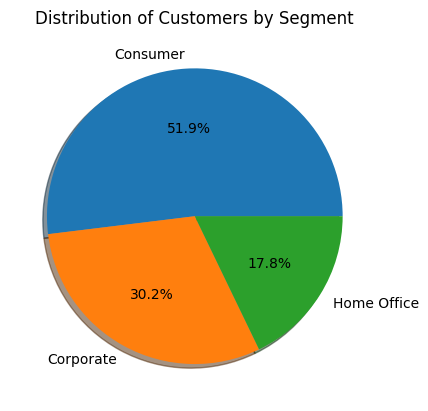

In [ ]:
# Plot the Number of Customers:
plt.title("Distribution of Customers by Segment")
plt.pie(number_of_customers['count'], labels=number_of_customers['Type Of Customer'], autopct='%1.1f%%', shadow=True)
plt.show()

  Type Of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.296531e+05


<BarContainer object of 3 artists>

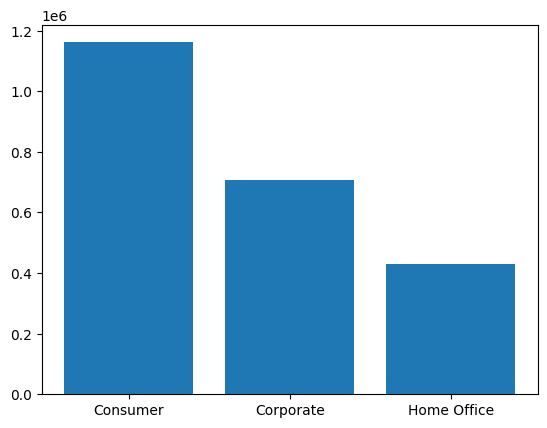

In [ ]:
# (While "Consumers" consist the mayority of our Customer Base, overlooking "Corporate" and "Home Office" Customers would leave almost the half of the earning potential unattended.)
# (Let's explore how to balance resource allocation to all 3 Segments for maximizing growth.)
# Explore Sales per Segment:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index().rename(columns={'Segment' : 'Type Of Customer', 'Sales' : 'Total Sales'})

print(sales_per_segment)
plt.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])

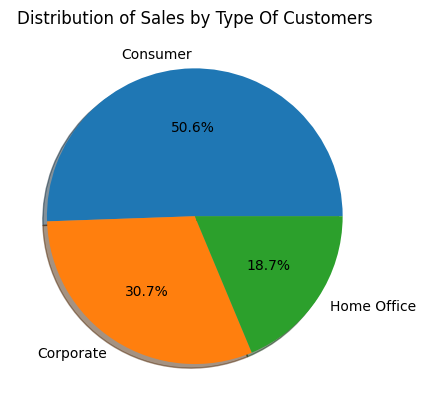

In [ ]:
# Plot the Number of Sales per Type Of Customers:
plt.title("Distribution of Type Of Customers by Sales")
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type Of Customer'], autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Explore the Frequency of Orders per Type Of Customers:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency.rename(columns={'Order ID' : 'Total Orders'}, inplace = True)
#("inplace = True": modifies the original Object).

In [ ]:
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] > 1]

In [ ]:
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending = False)

# Explore the Top 10 most frequent Customers:
print(repeat_customers_sorted.head(10).reset_index(drop=True))

# (Even that most of our best Customers are from the Consumer Segment, there is much potential to develop with the Home Office Customers as well;
# we can create promotions and discounts for them, or create Marketing Campaings pointed to them, etc).

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    MA-17560         Matt Abelman  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    PP-18955           Paul Prost  Home Office            34
4    JD-15895     Jonathan Doherty    Corporate            32
5    SV-20365          Seth Vernon     Consumer            32
6    EH-13765         Edward Hooks    Corporate            32
7    CK-12205  Chloris Kastensmidt     Consumer            32
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [ ]:
# Explore the Money Spent in Orders per Type Of Customers:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Explore the Top Spenders:
top_spenders = customer_sales.sort_values(by='Sales', ascending = False)
print(top_spenders.head(10).reset_index(drop=True))

# (The Top 10 Customers with More Orders and the Top 10 Customers with More Money Spent are not the same. Repeated Orders =! More Total Spending).

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


In [ ]:
# Explore which one of the Business' Shipping Methods is the most reliable:
shipping_model = df['Ship Mode'].value_counts().reset_index().rename(columns={'Ship Mode': 'Mode Of Shipment', 'count': 'Use Frequency'})
shipping_model.columns = shipping_model.columns.str.strip()

print("Columns: ", shipping_model.columns)
print(shipping_model)

Columns:  Index(['Mode Of Shipment', 'Use Frequency'], dtype='object')
  Mode Of Shipment  Use Frequency
0   Standard Class           5968
1     Second Class           1945
2      First Class           1538
3         Same Day            543


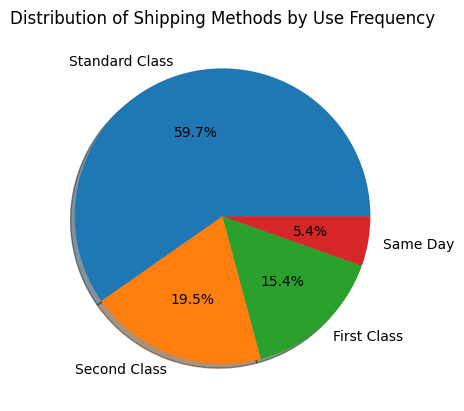

In [ ]:
plt.title("Distribution of Shipping Methods by Use Frequency")
plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Mode Of Shipment'], autopct='%1.1f%%', shadow=True)
plt.show()
# (Standard Class is the most popular method).

In [ ]:
# Explore in which Cities and Sates the Stores perform the best:
state = df['State'].value_counts().reset_index().rename(columns={'index': 'State', 'count': 'Number of Customers'})
state.columns = state.columns.str.strip()

print(state.head(20))

             State  Number of Customers
0       California                 2001
1         New York                 1128
2            Texas                  985
3     Pennsylvania                  587
4       Washington                  506
5         Illinois                  492
6             Ohio                  469
7          Florida                  383
8         Michigan                  255
9   North Carolina                  249
10         Arizona                  224
11        Virginia                  224
12         Georgia                  184
13       Tennessee                  183
14        Colorado                  182
15         Indiana                  149
16        Kentucky                  139
17   Massachusetts                  135
18      New Jersey                  130
19          Oregon                  124
